<a href="https://colab.research.google.com/github/tarabelo/2024-VIU-Quantum/blob/main/Puertas%20cu%C3%A1nticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

In [2]:
# importing Qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, UnitarySimulator, StatevectorSimulator

# import basic plot tools
from qiskit.visualization import plot_histogram

# Define el simulador básico
sim = AerSimulator()

# Funciones auxiliares
# Función para simular y mostrar el vector de estado
def obten_estado(qcirc, etiqueta):
    # Hacemos una simulación y obtenemos los resultados
    sim = StatevectorSimulator()
    result = sim.run(qc).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    display(estado.draw('bloch'))

# Funcion para obtener y mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    sim_u = UnitarySimulator()
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

#**Puertas cuánticas**

Contenidos

1. [Puertas clásicas vs cuánticas](#clasicascuanticas)
  - [Puertas clásicas como matrices](#clasicas)
  - [Computación reversible](#reversible)
  - [Puertas cuánticas](#cuanticas)
 <p></p>
1. [Puertas cuánticas de 1 cúbit](#1cubit)
    + [Puertas notables](#notables)
    - [Puertas como rotaciones en la esfera de Bloch](#bloch)
    - [Puertas de 1 cúbit en un sistema multicúbit](#puertas1c)
 <p></p>
1.  [Puertas controladas: CNOT](#cnot)
    + [Creación de estados entrelazados](#bell)
    + [Otras puertas controladas](#otrasp)
    + [Phase-kickback](#kick)   
<p></p>
1. [Otras puertas](#otras)
    + [Puerta swap](#swap)
    + [Puertas para múltiples cúbits](#multiples)

<a name="clasicascuanticas"></a>
# **Puertas clásicas vs cuánticas**

Las puertas clásicas (NOT, AND, OR, NAN, EXOR) actúan sobre 1 (NOT) o 2 bits.

Las principales puertas cuánticas también operan sobre 1 o 2 cúbits, manteniendo las restricciones impuestas por la física (reversibilidad).

<a name="clasicas"></a>
## Puertas clásicas como matrices

Podemos representar las puertas lógicas clásicas como matrices u operadores, tales que aplicados a un número binario obtienen un número binario.

Por ejemplo:

$$
\begin{aligned}
\text{NOT} &= \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}\\[10pt]
\text{AND} &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}\\[10pt]
\text{OR} &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}\\[10pt]
\end{aligned}
$$

Ejemplos:

$$
\begin{aligned}
\text{NOT}|0\rangle &= \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}
\begin{bmatrix} 1\\ 0\end{bmatrix} = \begin{bmatrix} 0\\ 1\end{bmatrix} = |1\rangle
\\[10pt]
\text{AND}|11\rangle &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\0\\1\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix} = |1\rangle \\[10pt]
\text{AND}|01\rangle &= \begin{bmatrix}1 & 1 & 1 & 0\\ 1 & 0 & 0 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 1\\0\\0\end{bmatrix} = \begin{bmatrix} 1\\ 0\end{bmatrix} = |0\rangle \\[10pt]
\text{OR}|10\rangle &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\1\\0\end{bmatrix} = \begin{bmatrix} 0\\1\end{bmatrix} = |1\rangle \\[10pt]
\text{OR}|11\rangle &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\0\\1\end{bmatrix} = \begin{bmatrix} 0\\1\end{bmatrix} = |1\rangle\\[10pt]
\end{aligned}
$$

Podemos obtener la representación de un conjunto de puertas mediante operaciones de matrices. Por ejemplo:

<center><img src="https://drive.google.com/uc?export=view&id=1ZwHOf-211JlZGff4w8GhFTatdJBtYrUC" alt="Circuito con puertas clasicas" width="300"  /></center>

La matriz equivalente a este circuito es:

$$
\text{OR}\cdot (\text{NOT}\otimes \text{AND}) =
\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\left(
\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}\otimes
\begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\right) = \\[10pt]
\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 1 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{bmatrix} =
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 1 & 1 & 0\\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

Es decir, las puertas en paralelo se combinan usando el producto tensor y en serie el producto matricial.

<a name="reversible"></a>
## Computación reversible

Las puertas clásicas, exceptuando la puerta NOT, son no-reversibles: no es posible obtener la entrada a partir de los valores de salida.

También puede verse en que las matrices, excepto la NOT, no son invertibles.

El modelo de [computación reversible](https://en.wikipedia.org/wiki/Reversible_computing) substituye las puertas clásicas por sus equivalentes reversibles:

<center><img src="https://drive.google.com/uc?export=view&id=1kZGt2hLqpdlg6YTOfy9xOTWb3y9UX_FV" alt="Puertas reversibles" width="500"  /></center>

Al bit auxiliar en la AND y NAND se le llama *bit ancilla*.

La [puerta Toffoli](https://en.wikipedia.org/wiki/Toffoli_gate) es universal: cualquier circuito booleano se puede expresar usando solo puertas Toffoli.

Otra puerta universal reversible es la [puerta Fredkin](https://en.wikipedia.org/wiki/Fredkin_gate) o Controlled-SWAP:

<center><img src="https://drive.google.com/uc?export=view&id=1ySJHdoVX3aTAc7DPSu9WsNRY8ehay0Wv" alt="Puerta Fredkin" width="100"  /></center>

La matriz de una puerta CNOT es:

$$ CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
$$

Así, si $|BA\rangle = |01\rangle$:

$$ CNOT|BA\rangle = CNOT|01\rangle =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}0 \\1\\0\\0 \end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = |11\rangle
$$

Se puede comprobar que $CNOT = CNOT^{-1}$

### Convertir puertas irreversibles en reversibles

Cualquier puerta que implemente una funcón $f(x)$, con $x\in \{0,1\}^n$ puede convertirse en reversible usando bits ancilla:

<center><img src="https://drive.google.com/uc?export=view&id=1ckdPqv6_TpfSsTsqwCdAb7bPLpg0E7RA" alt="Puertas reversible" width="300"  /></center>



<a name="cuanticas"></a>
## Puertas cuánticas

Debido al requisito de reversibilidad de las operaciones con cúbits, no es posible usar las puertas clásicas, exceptuando la NOT, pero sí es posible usar sus versiones reversibles.

Las puertas que actúan sobre cúbits tienen, además, que conservar la norma del vector. Puertas que cumplan ambas condiciones se pueden representar mediante matrices unitarias.

Una matriz unitaria $U$ que actúa sobre un estado cuántico de $n$ cúbits es una matriz $2^n\times 2^n$ que verifica  $U^\dagger U = UU^\dagger = I$, siendo $U^\dagger$ la conjugada transpuesta de $U$.

La inversa de $U$ por lo tanto es $U^{-1} = U^\dagger$

La puerta se aplica al estado mediante un producto matriz-vector:
$$
|\Phi\rangle = U|\psi\rangle = \begin{bmatrix}u_{00} & u_{01} \\ u_{10} & u_{11} \end{bmatrix}\begin{bmatrix}a_{0} \\ a_{1}\end{bmatrix}
$$



---



---



---



<a name="1cubit"></a>
# **Puertas cuánticas de 1 cúbit**

Para bits, la única puerta de 1 bit es la NOT.

Para cúbits existen, en principio, infinitas puertas que modifican el estado del mismo (todas las matrices unitarias 2x2).

<a name="notables"></a>
## Puertas notables

### Puertas (o matrices) de Pauli

$$
\sigma_0\equiv I = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}
$$

$$
\sigma_1\equiv\sigma_x\equiv X \equiv NOT = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}
$$

$$
\sigma_2\equiv \sigma_y \equiv Y = \begin{bmatrix}0 & -i\\i & 0\end{bmatrix}
$$

$$
\sigma_3\equiv\sigma_z\equiv Z = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
$$

Estas matrices son involutivas: $X^2=Y^2=Z^2=-iXYZ=I$

----------------------------------------------------------

**Ejemplos**

Puerta X (NOT en base $\{|0\rangle,|1\rangle\}$)

$$
\begin{aligned}
X|0\rangle = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 1\end{bmatrix} = |1\rangle \\[10pt]
X|1\rangle = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix} = |0\rangle
\end{aligned}
$$

Puerta Z (_phase shift_ de $\pi$ radianes o NOT en base $\{|+\rangle,|-\rangle\}$)

$$
\begin{aligned}
Z|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1\end{bmatrix} = |-\rangle \\[10pt]
Z|-\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ -1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1\end{bmatrix} = |+\rangle
\end{aligned}
$$

----------------------------------------------------------

### Puertas cuánticas en Qiskit

En Qiskit, los cúbits se inicializan a $|0\rangle$ por defecto y se aplican puertas para obtener el estado deseado.

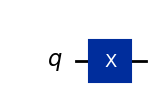

In [3]:
# Circuito de 1 cúbit en el estado |0> con una puerta X
qc = QuantumCircuit(1)

# Aplicamos la puerta X al cúbit
qc.x(0)

qc.draw('mpl')

<IPython.core.display.Latex object>

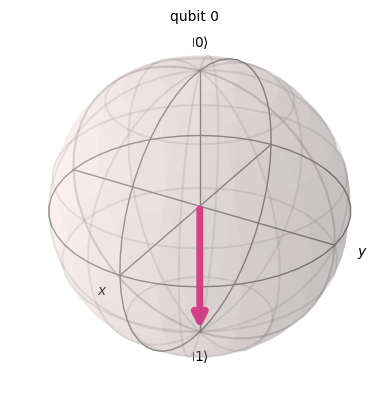

In [4]:
# La funcion obten estado muestra el estado y la esfera de Bloch
obten_estado(qc, "X|0\\rangle = ")

### Ejercicio: Puerta Z
Crea un circuito de 1 cúbit en estado $|+\rangle$, aplícale una puerta $Z$ y obtén el vector de estado de salida.

In [ ]:
# Circuito de 1 cúbit en el estado |+> con una puerta Z
from math import sqrt
qc = QuantumCircuit(1)
# Inicializa el circuito al estado |+>
qc.initialize(....)

# Aplicamos la puerta Z al cúbit
qc....

# Muestra el circuito y el estado
display(qc.draw('mpl'))
obten_estado(qc, "Z|+\\rangle = ")

### Aplicación de varias puertas

Al igual que en el caso clásico, si aplicamos varias puertas sobre un mismo cúbit la matriz equivalente será el producto de las matrices de cada puerta.

Qiskit proporciona un `simulador unitario`que obtiene esa matriz por nosotros:

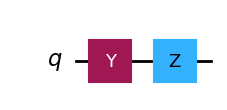

In [5]:
# Circuito con varias puertas simples y obtenemos la matriz unitaria equivalente
qc = QuantumCircuit(1)
qc.y(0)
qc.z(0)
#Necesito indicar que se salve la matriz unitaria
#qc.save_unitary()

qc.draw('mpl')

In [6]:
# Simula y obtén la matriz unitaria equivalente
from qiskit_aer import UnitarySimulator

sim_u = UnitarySimulator()

result = sim_u.run(qc).result()
unitary = result.get_unitary(qc)
unitary.draw('latex', prefix="ZY = ")

<IPython.core.display.Latex object>

In [7]:
# Otra forma de hacerlo
# Circuito con varias puertas simples y obtenemos la matriz unitaria equivalente
qc = QuantumCircuit(1)
qc.y(0)
qc.z(0)

#Necesito indicar que se salve la matriz unitaria
qc.save_unitary()

from qiskit_aer import AerSimulator

sim_u = AerSimulator(method='unitary')

result = sim_u.run(qc).result()
unitary = result.get_unitary(qc)
unitary.draw('latex', prefix="ZY = ")

<IPython.core.display.Latex object>

Debido a que el producto de matrices no es conmutativo, al obtener la matriz equivalente, tenemos que tener en cuenta que el orden en el que se aplican las puertas:

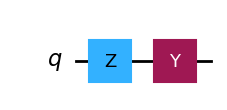

In [8]:
# Circuito con dos puertas y obtenemos la matriz unitaria equivalente
qc = QuantumCircuit(1)
qc.z(0)
qc.y(0)
qc.draw('mpl')

In [9]:
# Uso la función obten_unitaria definida antes
obten_unitaria(qc, "YZ = ")

<IPython.core.display.Latex object>

### Puerta _phase shift_ <a id="phase"></a>

Puertas que cambian la fase relativa:

$$
R_\theta  = \begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}
$$

La inversa de $R_\theta$ es su conjugada traspuesta:
$$
R_\theta^\dagger = \begin{bmatrix}1 & 0 \\ 0 & e^{-i\theta} \end{bmatrix}
$$



---


**Ejemplo:**

$$
R_\theta|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ e^{i\theta}\end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle)
$$



---


Casos particulares:

$$
Z = R_\pi = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi} \end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$$
S = R_{\pi/2} = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/2} \end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & i \end{bmatrix} = \sqrt{Z}
$$

$$
T = R_{\pi/4} = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} = \sqrt{S}
$$


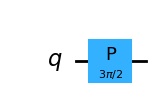

<IPython.core.display.Latex object>

In [10]:
# Ejemplo: rotación 3𝜋/2
import numpy as np
qc = QuantumCircuit(1)
theta = 3*np.pi/2
qc.p(theta, 0)
display(qc.draw('mpl'))
obten_unitaria(qc, "R_{3\pi/2} = ")

### Puerta Hadamard <a id="hada"></a>

$$
H = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}
$$

Esta puerta permite transformar un estado simple ($|0\rangle$ o $|1\rangle$) en un estado en superposición.


---


**Ejemplos**

$$
H|0\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix}1 \\ 0 \end{bmatrix} =  \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle) =  |+\rangle
$$

$$
H|1\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix}0 \\ 1 \end{bmatrix} =  \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) =  |-\rangle
$$


---


### Ejercicio: puerta H

Crea un circuito de 1 cúbit en estado $|0\rangle$ (por defecto), aplícale una puerta $H$ y obtén el vector de estado de salida.

In [ ]:
# Crea un circuito de 1 cúbit para obtener el estado |+>
qc = ....

# Aplicamos la puerta correspondiente al cúbit
qc....

display(qc.draw('mpl'))

obten_estado(qc, "H|0\\rangle = ")

<a name="bloch"></a>
## Puertas como rotaciones en la esfera de Bloch

Las puertas pueden verse como una rotación del cúbit en la esfera de Bloch:

- $X$, $Y$, $Z$: rota un ángulo $\pi$ alrededor del eje x, y o z, respectivamente
- $R_\theta$ o $R_z(\theta)$: rota un ángulo $\theta$ alrededor del eje z
- $S$: rota $\tfrac{\pi}{2}$ alrededor del eje z
- $T$: rota $\tfrac{\pi}{4}$ alrededor del eje z
- $H$:  combinación de dos rotaciones: primero $\pi$ alrededor de z seguida de $\pi/2$ alrededor de y

En general, existen infinitas puertas. Las más usadas son rotaciones alrededor de z, simplemente por usar como base estándar $\{|0\rangle,|1\rangle\}$, pero también existen $R_x(\phi)$ y $R_y(\phi)$. Estas rotaciones se pueden expresar como exponenciales de las matrices de Pauli:

$$
R_x(\theta) = e^{-i\theta \sigma_x/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_x =
\begin{bmatrix}
\cos\frac{\theta}{2}   & -i\sin\frac{\theta}{2}\\
-i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix}
$$

$$
R_y(\theta) = e^{-i\theta \sigma_y/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_y =
\begin{bmatrix}
\cos\frac{\theta}{2}   & -\sin\frac{\theta}{2}\\
\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix}
$$

$$
\begin{aligned}
R_z(\theta) & = e^{-i\theta \sigma_z/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_z =
\begin{bmatrix}
e^{-i\frac{\theta}{2}}   & 0\\
0 & e^{i\frac{\theta}{2}}
\end{bmatrix} \\
&=
e^{-i\frac{\theta}{2}} \begin{bmatrix}
1   & 0\\
0 & e^{i\theta}
\end{bmatrix}= e^{-i\frac{\theta}{2}}R_\theta
\end{aligned}
$$

Así, la puerta $H$ puede escribirse como:
$$
\begin{aligned}
H &= R_y(\tfrac{\pi}{2})R_z(\pi) =
\begin{bmatrix}
\cos\frac{\pi}{4}   & -\sin\frac{\pi}{4}\\
\sin\frac{\pi}{4} & \cos\frac{\pi}{4}
\end{bmatrix}
\begin{bmatrix}
1   & 0\\
0 & e^{i\pi}
\end{bmatrix} \\[10pt] &=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1   & -1\\
1 & 1
\end{bmatrix}
\begin{bmatrix}
1   & 0\\
0 & -1
\end{bmatrix} =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1   & 1\\
1 & -1
\end{bmatrix}
\end{aligned}
$$


### Ejercicio: Puerta $R_y(\theta)$

Aplica una puerta $R_y(\theta)$ a 1 cúbit $|0\rangle$ para obtener un estado con un 30% de probabilidad de medir 0 y un 70% de medir 1
- Recuerda que podemos escribir el estado como $|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$
- Crea el circuito y simúlalo, comprobando que funciona

In [ ]:
from math import sqrt,acos

prob = [0.3, 0.7]

qc = QuantumCircuit(1, 1)

# Calcula el valor de 𝜃
theta = ... # @param {type:"raw"}
print(f"𝜃 = {theta}")

qc.ry(theta, 0)
qc.measure(0, 0)
display(qc.draw('mpl'))

# Hacemos 1024 simulaciones (shots)
job_sim = AerSimulator().run(qc, shots=10000)
# Obtenemos los resultados
result = job_sim.result()
# Mostramos el histograma
plot_histogram(result.get_counts())

<a name="puertas1c"></a>
## Puertas de 1 cúbit en un sistema multicúbit

Igual que en el caso de puertas clásicas, las puertas en paralelo (que actúan sobre dos cúbits diferentes) se combinan usando el producto tensor.

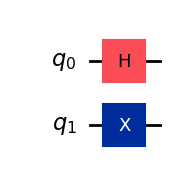

<IPython.core.display.Latex object>

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
obten_unitaria(qc, "X\otimes H = ")

El efecto conjunto de ambas puertas puede obtenerse mediante el producto tensor de sus matrices (en el caso de Qiskit el orden es del cúbit más al menos significativo):

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

Ese producto tensor es:

$$
\begin{aligned}
X\otimes H &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} \\
&= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
\end{aligned}
$$

que se multiplica por el vector de 4 filas $|q_1 q_0\rangle$.

La matriz anterior se puede escribir como:

$$
X\otimes H =
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$


Si solo tenemos una puerta actuando sobre un cúbit, se considera que sobre la otra actúa la puerta $I$

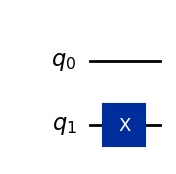

<IPython.core.display.Latex object>

In [13]:
qc = QuantumCircuit(2)
qc.x(1)
display(qc.draw('mpl'))
obten_unitaria(qc,"X\otimes I = ")

En este ejemplo, las puertas aplicadas son:
$$
X|q_1\rangle \otimes I|q_0\rangle = (X\otimes I)|q_1 q_0\rangle
$$

Otro ejemplo más complejo:

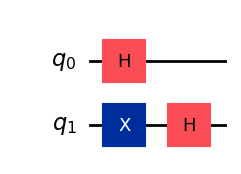

<IPython.core.display.Latex object>

In [14]:
# 2 cúbits y 3 puertas
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw('mpl'))
obten_unitaria(qc, "(H\otimes I)\cdot(X\otimes H) = HX\otimes IH = ")

Si aplicamos esa matriz al estado $|00\rangle$ tenemos:

$$
\frac{1}{2}\begin{bmatrix}1&1&1&1\\1&-1&1&-1\\-1&-1&1&1\\-1&1&1&-1\end{bmatrix}\begin{bmatrix}1\\0\\0\\0\end{bmatrix} = \frac{1}{2}\begin{bmatrix}1\\1\\-1\\-1\end{bmatrix}
$$

Este estado es el $|-+\rangle = |-\rangle \otimes |+\rangle$, ya que tenemos el producto:

$$
HX|0\rangle \otimes H|0\rangle = H|1\rangle \otimes H|0\rangle = |-\rangle\otimes|+\rangle
$$

Podemos verificarlo así:
$$
|-+\rangle = |-\rangle\otimes|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\-1\end{bmatrix}\otimes\tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\1\end{bmatrix} = \frac{1}{2}\begin{bmatrix}1\\1\\-1\\-1\end{bmatrix}\\ = \frac{1}{2}(|00\rangle+|01\rangle-|10\rangle-|11\rangle)
$$



---



---



---



 <a name="cnot"></a>
# **Puertas controladas: CNOT**

Puerta CNOT: Realiza un NOT (puerta X) en el cúbit objetivo (_target_) si el estado del cúbit de control es $|1\rangle$. La puerta se representa en un circuito como la del siguiente ejemplo, con `q0` como control y `q1` como target:

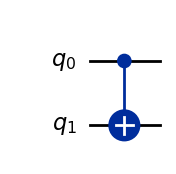

<IPython.core.display.Latex object>

In [15]:
qc = QuantumCircuit(2)
# Aplica CNOT, primer parámetro control, segundo target
qc.cx(0,1)
display(qc.draw('mpl'))

obten_unitaria(qc, "CNOT = ")

Esta matriz intercambia las amplitudes de los estados $|01\rangle$ y $|11\rangle$ del vector de estado (aquellos en las que el cúbit `q0` es 1):

$$
|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{1} \\ a_{2} \\ a_{3} \end{bmatrix}, \quad \text{CNOT}|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{3} \\ a_{2} \\ a_{1} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

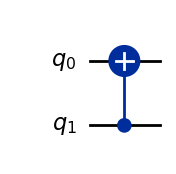

<IPython.core.display.Latex object>

In [16]:
qc = QuantumCircuit(2)
# Aplica CNOT, primer parámetro control, segundo target
qc.cx(1,0)
display(qc.draw('mpl'))

obten_unitaria(qc, "CNOT = ")

<a name="bell"></a>
## Creación de estados entrelazados

Supongamos una CNOT que usa control un cúbit en estado $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ y como target un cúbit en estado $|0\rangle$:

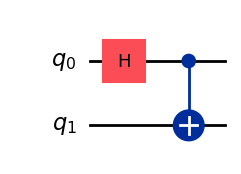

<IPython.core.display.Latex object>

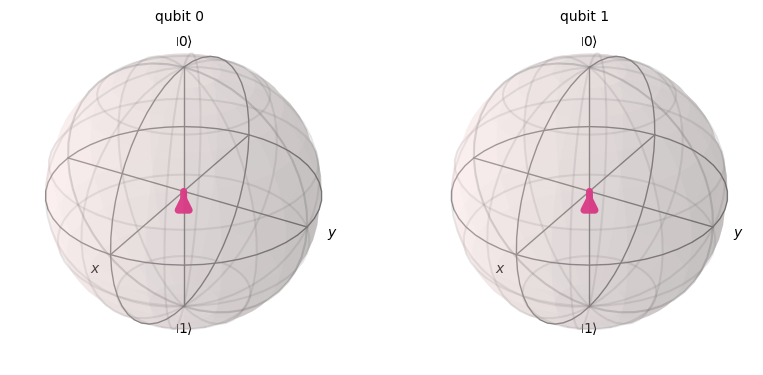

In [17]:
qc = QuantumCircuit(2)
qc.h(0)

# CNOT: primer parámetro: control, segundo: target
qc.cx(0,1)

display(qc.draw('mpl'))
obten_estado(qc, "\\text{CNOT}|0+\\rangle = ")

El estado obtenido es:
$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}\text{CNOT}(|00\rangle + |01\rangle)= \tfrac{1}{\sqrt{2}}(\text{CNOT}|00\rangle + \text{CNOT}|01\rangle) = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

que es un ejemplo de estado entrelazado, en concreto el **estado 0 de Bell**.

### Estados de Bell

Son los siguientes estados entrelazados:

$$
|\beta_{00}\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$
$$
|\beta_{01}\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}
$$
$$
|\beta_{10}\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}
$$
$$
|\beta_{11}\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}
$$

Esos estados forman una base del espacio de Hilbert de 2 cúbits.

El estado $|\beta_{00}\rangle$ se obtiene con el circuito anterior.

Para conseguir los estados restantes, se puede utilizar la siguiente expresión general:

$$
|\beta_{ij}\rangle = (I\otimes X^jZ^i)|\beta_{00}\rangle
$$

### Ejercicio: creación de estados de Bell

Obtén circuitos para los tres estados de Bell restantes.

**Estado 1 de Bell**

In [ ]:
# |𝛽_01⟩=(𝐼⊗𝑋¹𝑍⁰)|𝛽_00⟩ = (𝐼⊗𝑋)|𝛽_00⟩
qc = QuantumCircuit(2)

# Aplica las puertas para obtener |𝛽_00⟩
qc....
qc....

# Aplica la puerta X al cúbit que corrresponda
qc.x()

display(qc.draw('mpl'))

obten_estado(qc, "|\\beta_{01}\\rangle = ")

**Estado 2 de Bell**

In [ ]:
# |𝛽_01⟩=(𝐼⊗𝑋⁰𝑍¹)|𝛽_00⟩ = (𝐼⊗𝑍)|𝛽_00⟩
qc = QuantumCircuit(2)

# Aplica las puertas para obtener |𝛽_00⟩
qc...
qc...

# Aplica la otra puerta
qc....

display(qc.draw('mpl'))

obten_estado(qc, "|\\beta_{10}\\rangle = ")

**Estado 3 de Bell**

In [ ]:
# |𝛽_01⟩=(𝐼⊗𝑋¹𝑍¹)|𝛽_00⟩ = (𝐼⊗𝑋𝑍)|𝛽_00⟩
qc = QuantumCircuit(2)


# Aplica las puertas para obtener |𝛽_00⟩
qc...
qc...

# Aplica las otras puertas
qc....
qc....

display(qc.draw('mpl'))

obten_estado(qc, "|\\beta_{10}\\rangle = ")

### Estados entrelazados de más cúbits

Los estados entrelazados de más de 2 cúbits se denominan [estados _GHZ_](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state)

Uno de estos estados para 3 cúbits es:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}
$$

y se puede obtener con el siguiente circuito:

In [ ]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
display(qc.draw('mpl'))

obten_estado(qc, "|GHZ\\rangle = ")

## Otras puertas controladas <a id="otrasp"></a>

La puerta CNOT se llama también controlled-X. Esa misma idea se puede aplicar a cualquier otra puerta $U$. La matrix de una operación controlled-U es, suponiendo $q_0$ el cúbit más significativo:

$$
\begin{aligned}
\text{U} & =
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & =
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$

O suponiendo $q_0$ el cúbit menos significativo (orden usado en Qiskit)

$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$

**Ejemplo**: Puerta Y controlada

In [ ]:
c = 0
t = 1
qc = QuantumCircuit(2)
qc.cy(c, t)
display(qc.draw('mpl'))


obten_unitaria(qc, "\\text{Controlled-Y} = \n")

**Ejemplo**: Puerta H controlada

In [ ]:
qc = QuantumCircuit(2)
qc.ch(c, t)
display(qc.draw('mpl'))

obten_unitaria(qc, "\\text{Controlled-H} = \n")

<a name="kick"></a>
## Phase-kickback

Un efecto interesante se ve cuando se usan rotaciones controladas.

Por ejemplo, si aplicamos una puerta $Z$ a un cúbit en estado simple ($|0\rangle$ o $|1\rangle$), no produce ningún efecto:

$$
Z|0\rangle =
\begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix}1 \\ 0\end{bmatrix} =
\begin{bmatrix}1 \\ 0\end{bmatrix}
= |0\rangle
$$

$$
Z|1\rangle =
\begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix}0 \\ 1\end{bmatrix} =
\begin{bmatrix}0 \\ -1\end{bmatrix}
= -|1\rangle = |1\rangle
$$

En el segundo caso, el $-$ es una _fase global_, que no es observable.

Pero si aplicamos una $Z$ controlada por un cúbit en estado $|{+}\rangle$ teniendo como target un cúbit en estado $|1\rangle$ se produce un cambio de _fase relativa_ en el cúbit de control.

Así, si $q_0=|+\rangle$ y $q_1=|1\rangle$,  y aplicamos una `C-Z` al estado $|1{+}\rangle$ tenemos:

$$
\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{C-Z}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{C-Z}|10\rangle + \text{C-Z}|11\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + Z|1\rangle\otimes |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle - |11\rangle) \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |1{-}\rangle
\end{aligned}
$$

Es decir, el cúbit $q_1$ se queda como está mientras que el $q_0$ rota $\pi$ en torno al eje z.  Este efecto se conoce como _phase-quickback_

In [ ]:
# Cúbit de control
c = 0
# Cúbit target
t = 1
qc=QuantumCircuit(2)
qc.h(c)
qc.x(t)
qc.cz(c,t)
display(qc.draw('mpl'))

obten_estado(qc, "(X\otimes H)|00\\rangle = ")

El efecto es idéntico si se intercambian los bits de control y target

In [ ]:
qc=QuantumCircuit(2)
qc.h(c)
qc.x(t)

# Intercambio el papel de control y target
qc.cz(t,c)
display(qc.draw('mpl'))

obten_estado(qc, "(X\otimes H)|00\\rangle = ")

### Ejercicio: Controlled-Z

Crea un circuito que obtenga el siguiente estado:

$$
|\psi\rangle = \frac{1}{2}(|00\rangle+|01\rangle-|10\rangle+|11\rangle)
$$

In [ ]:
n = 2
qc = QuantumCircuit(n)

# Pon los cúbits en superposición
# para obtener el estado |𝜓⟩=1/2(|00⟩+|01⟩+|10⟩+|11⟩)
qc....

# La puerta C-Z cambia el signo del estado |11>
# Aplicamos la puerta C-Z para obtener
# el estado |𝜓⟩=1/2(|00⟩+|01⟩+|10⟩-|11⟩)
qc....

# Aplicamos una puerta a q0 y para obtener
# |𝜓⟩=1/2(|01⟩+|00⟩+|11⟩-|10⟩)
qc....

display(qc.draw('mpl'))

obten_estado(qc, "|\psi\\rangle = ")



---



---



---



<a name="otras"></a>
# **Otras puertas**

<a name="swap"></a>
## Puerta swap

Intercambia dos cúbits

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
qc.swap(0,1)
display(qc.draw('mpl'))

obten_estado(qc, "\\text{SWAP}|10\\rangle = \n")

<a name="multiples"></a>
## Puertas para múltiples cúbits

El vector de estado de un sistema de n cúbits puede escribirse como:

$$
|\psi\rangle = \sum_{i=0}^{2^n-1} a_i|i\rangle
$$
donde $a_i \in \mathbb{C}$ y $\sum_{i=0}^{2^n-1}|a_i|^2 = 1$.bold text

### Puerta _Walsh-Hadamard_<a id="wh"></a>

El uso de puertas `H` permite poner los n-cúbits en un estado de superposición.

El estado de _superposición completa_ es:

$$
|+\rangle^{\otimes n} = H^{\otimes n}|0\rangle^{\otimes n}
$$

$H^{\otimes n}$ se conoce como puerta _Walsh-Hadamard_.

Ejemplo para 4 cúbits:

$$
H^{\otimes 4}|1010\rangle = H|1\rangle\otimes H|0\rangle\otimes H|1\rangle\otimes H|0\rangle = \\
\frac{1}{4}\left[(|0\rangle - |1\rangle)\otimes (|0\rangle + |1\rangle) \otimes (|0\rangle - |1\rangle) \otimes (|0\rangle + |1\rangle)\right] = \frac{1}{4}\left[\\
|0000\rangle+|0001\rangle-|0010\rangle-|0011\rangle+\\
|0100\rangle+|0101\rangle-|0110\rangle-|0111\rangle-\\
|1000\rangle-|1001\rangle+|1010\rangle+|1011\rangle-\\
|1100\rangle-|1101\rangle+|1110\rangle+|1111\rangle\phantom{-}\right]
$$

En este ejemplo, el signo negativo aparece en los estados $|x_3x_2x_1x_0\rangle$ para los que se verifica que:
    
$$
(x_3x_2x_1x_0)\cdot(1010) = x_3\cdot 1\oplus x_2\cdot 0 \oplus x_1\cdot 1 \oplus x_0\cdot 0 = x_3\cdot x_1 = 1
$$

que son los estados para los que $x_3 \ne x_1$.
    
En general, para un estado $|x\rangle = |x_{n-1}x_{n-2}\ldots x_0\rangle$ de n-cúbits, se puede escribir:

$$
H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} (-1)^{x\cdot i}|i\rangle
$$

siendo $x\cdot i = x_{n-1}i_{n-1}\oplus x_{n-2}i_{n-2}\oplus \ldots \oplus x_0i_0$


In [ ]:
n = 3
qc=QuantumCircuit(n)
qc.x(1)
for i in range(n):
    qc.h(i)

display(qc.draw('mpl'))

obten_estado(qc, "|\psi\\rangle = ")

### Puerta Toffoli (Controlled-Controlled-NOT o CCX)<a id="toffoli"></a>

La puerta Toffoli es una puerta de tres qubits con dos controles y un target. Realiza una X en el target sólo si ambos controles están en el estado $|1\rangle$. Permite implementar un AND o NAND de los controles.

In [ ]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli con bits de control a y b y target t
qc.ccx(a,b,t)
qc.draw('mpl')

Si el estado inicial del target es |0⟩, su estado final será un AND de ambos controles. Si el estado inicial del target es |1⟩, su estado final será un NAND de ambos controles.

### Puertas controladas genéricas<a id="genericas"></a>

En general, se puede pensar en puertas $U$ que actúan sobre $k$ cúbits y que son controladas por $n$ cúbits:

<center><img src="https://drive.google.com/uc?export=view&id=1N0OgtidrJdounWS0ybEkgWwHo_CVIw32" alt="Puerta controlada genérica" width="300"  /></center>

In [ ]:
# Ejemplo: puerta MCMT en Qiskit
from qiskit.circuit.library import MCMT
n = 5
qc = QuantumCircuit(n)
qc = qc.compose(MCMT('z',n-2,2))
qc.draw('mpl')